# Insurance Premium Prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### EDA

In [3]:
# Load the dataset
df = pd.read_csv("D:\My ML Projects\Insurance Premium Predictor\insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [9]:
temp = df.describe()
temp.loc[['min','max']]


,age,bmi,children,expenses
min,18.0,16.0,0.0,1121.87
max,64.0,53.1,5.0,63770.43


### Check the null values

In [11]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

There are no null values in the dataset

<AxesSubplot:xlabel='sex', ylabel='count'>

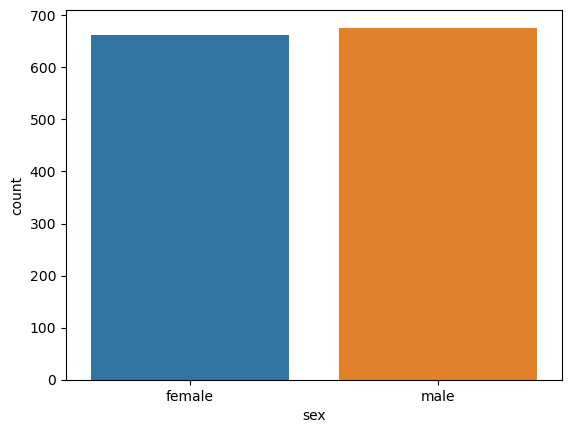

In [16]:
#See the number of male and female

sns.countplot(x='sex', data=df) 

In [17]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

There are 14 men more than the female

In [18]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

<AxesSubplot:xlabel='region', ylabel='count'>

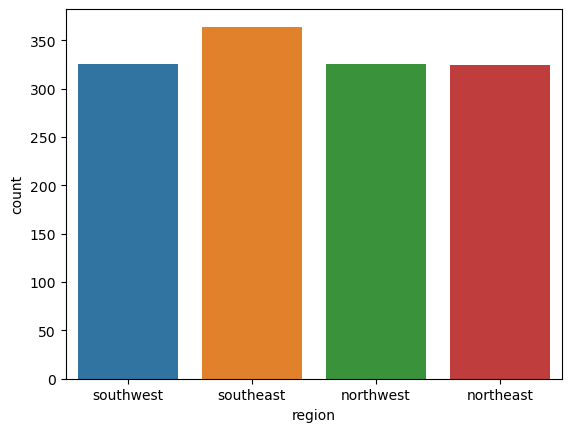

In [21]:
sns.countplot(x=df.region)

**People are most likely from southeast region**

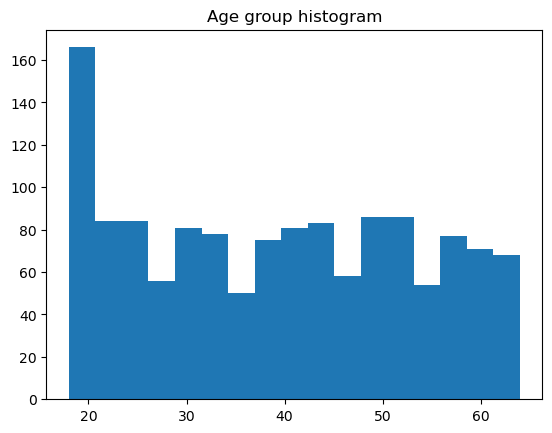

In [23]:
#plt.figure(figsize=(15,7))
plt.title("Age group histogram")
plt.hist(df['age'],bins=17)
plt.show()

C:\Users\prajw\AppData\Local\Temp\ipykernel_13048\3132616947.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(y=df['age'],x=df['expenses'],palette='RdYlGn_r')


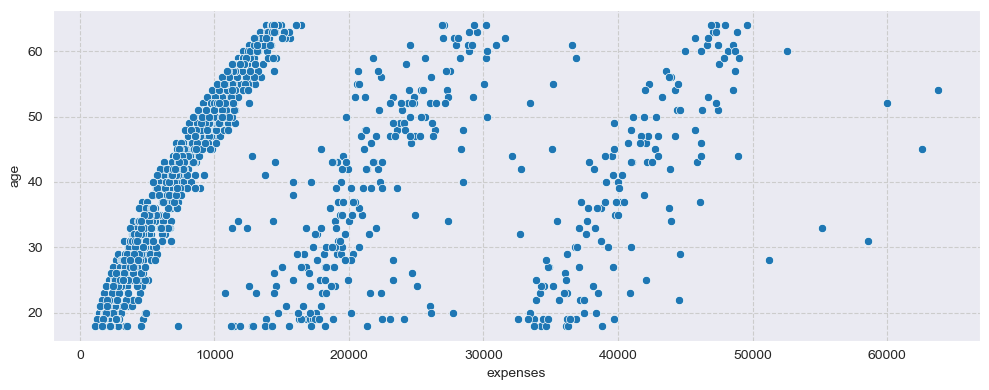

In [24]:
plt.figure(figsize=(10,4))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.scatterplot(y=df['age'],x=df['expenses'],palette='RdYlGn_r')
plt.tight_layout()
plt.grid(True)
plt.show()

### See smokers vs Non smokers

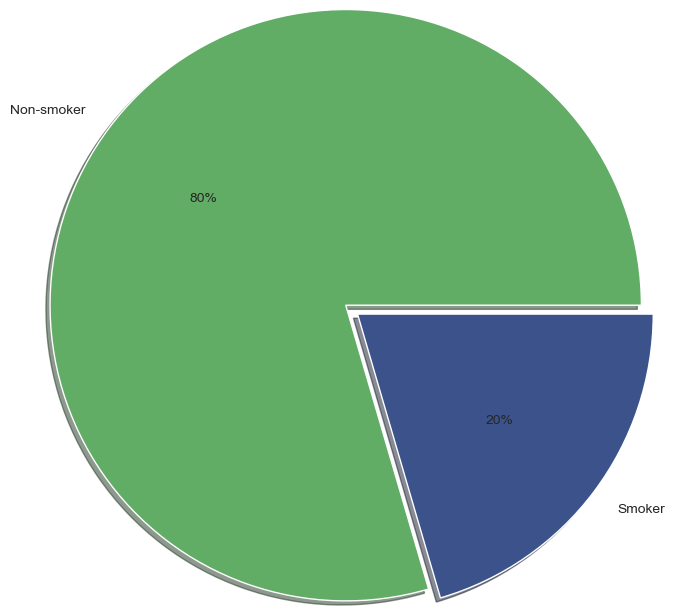

In [26]:
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
out_df=pd.DataFrame(df.groupby('smoker')['smoker'].count())
colors = ['#61ad66','#3b528b']
plt.pie(out_df['smoker'],labels=['Non-smoker','Smoker'],autopct='%.0f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)
plt.show()

In [27]:
pd.DataFrame(df.groupby('smoker')['smoker'].count())

,smoker
smoker,
no,1064
yes,274


In [28]:
df.children.describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

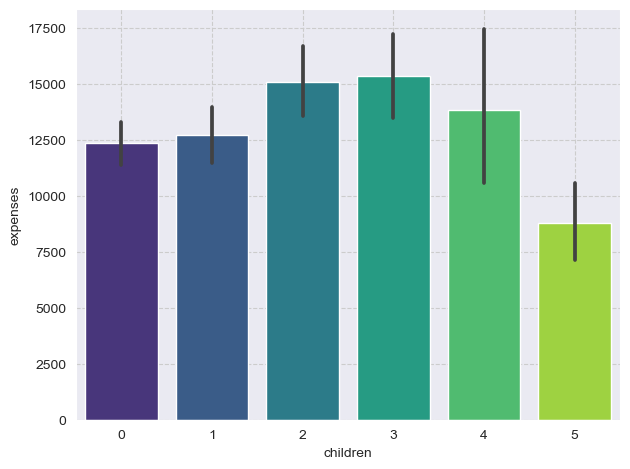

In [29]:
sns.barplot(x='children',y='expenses',data=df,palette='viridis',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

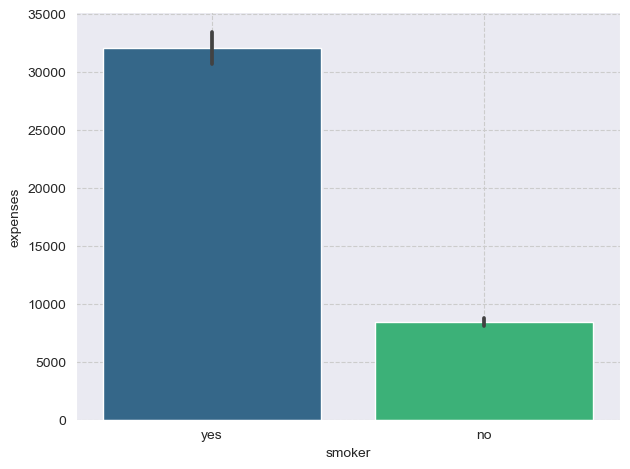

In [30]:
sns.barplot(x='smoker',y='expenses',data=df,palette='viridis',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

### See the relation between BMI and expenses

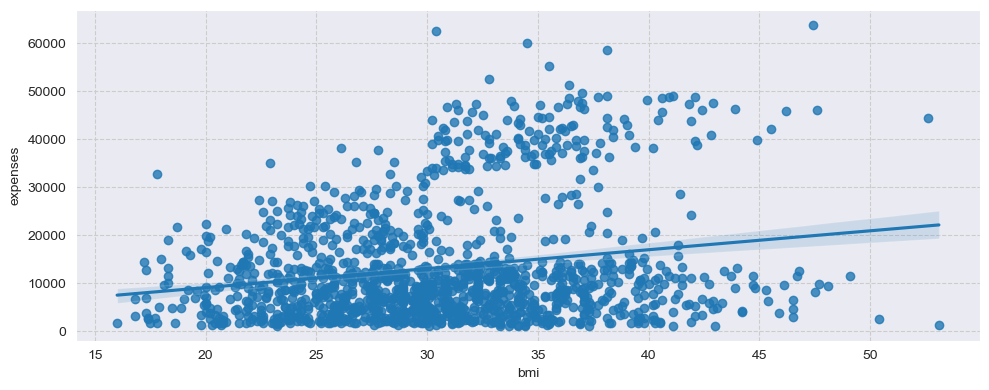

In [33]:
plt.figure(figsize=(10,4))
sns.regplot(x=df['bmi'],y=df['expenses'])
plt.tight_layout()
plt.grid(True)
plt.show()

In [34]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])


In [36]:
df.head(10)

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
5,31,0,25.7,0,0,2,3756.62
6,46,0,33.4,1,0,2,8240.59
7,37,0,27.7,3,0,1,7281.51
8,37,1,29.8,2,0,0,6406.41
9,60,0,25.8,0,0,1,28923.14


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X=df.drop('expenses',axis=1)
y=df.expenses
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=12)

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
lr = RandomForestRegressor()
lr.fit(X_train,y_train)
pr = lr.predict(X_test)


In [42]:
from sklearn.metrics import mean_squared_error, r2_score


In [43]:
print(mean_squared_error(y_test,pr))

25330399.373542037


In [44]:
import numpy as np
print(np.sqrt(mean_squared_error(y_test,pr)))

5032.931489057052


In [45]:
lr.score(X,y)

0.945886683349901

In [57]:
r2_score(y_test, pr)*100

82.41083889994155

In [46]:
lr.score(X_test,pr)

1.0

## XGBRFREGRESSOR

In [52]:
from xgboost import XGBRFRegressor

In [53]:
model_xgb = XGBRFRegressor()
model_xgb.fit(X_train, y_train)
pred_xgb = model_xgb.predict(X_test)

In [55]:
mse = mean_squared_error(y_test, pred_xgb)
mse

24545469.22884738

In [56]:
r2_score(y_test, pred_xgb)*100

82.955886080751